# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
import json

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs (BTC)
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_response_data = requests.get(btc_url).json()
btc_response_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18609543,
   'total_supply': 18609543,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 32263.0,
     'volume_24h': 42856610603,
     'market_cap': 600595408892,
     'percentage_change_1h': 0.123612484680445,
     'percentage_change_24h': 1.64253313163939,
     'percentage_change_7d': -9.89172179761479,
     'percent_change_1h': 0.123612484680445,
     'percent_change_24h': 1.64253313163939,
     'percent_change_7d': -9.89172179761479},
    'CAD': {'price': 41093.3831,
     'volume_24h': 54586464925.0411,
     'market_cap': 764978372305.74,
     'percent_change_1h': 0.123612484680445,
     'percent_change_24h': 1.64253313163939,
     'percent_change_7d': -9.89172179761479}},
   'last_updated': 1611532847}},
 'metadata': {'timestamp': 1611532847,
  'num_cryptocurrencies': 1385,
  'error': None}}

In [6]:
# Crypto API URLs (ETH)
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_response_data = requests.get(eth_url).json()
eth_response_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114389848,
   'total_supply': 114389848,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1390.03,
     'volume_24h': 39891029336,
     'market_cap': 159292411351,
     'percentage_change_1h': 1.33688411821431,
     'percentage_change_24h': 13.6790764825037,
     'percentage_change_7d': 13.0676923434964,
     'percent_change_1h': 1.33688411821431,
     'percent_change_24h': 13.6790764825037,
     'percent_change_7d': 13.0676923434964},
    'CAD': {'price': 1770.481211,
     'volume_24h': 50809204065.2632,
     'market_cap': 202890744337.769,
     'percent_change_1h': 1.33688411821431,
     'percent_change_24h': 13.6790764825037,
     'percent_change_7d': 13.0676923434964}},
   'last_updated': 1611533039}},
 'metadata': {'timestamp': 1611533039,
  'num_cryptocurrencies': 1385,
  'error': None}}

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response_data['data']['1']['quotes']['USD']['price']

btc_USD_Price = ()
btc_USD_Price = btc_response_data['data']['1']['quotes']['USD']['price']
btc_USD_Price

32263.0

In [8]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_response_data['data']['1027']['quotes']['USD']['price']

eth_USD_Price = ()
eth_USD_Price = eth_response_data['data']['1027']['quotes']['USD']['price']
eth_USD_Price

1390.03

In [9]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_USD_Price
my_btc_value

38715.6

In [10]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_eth_value = my_eth * eth_USD_Price
my_eth_value

7367.159

In [11]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38715.60
The current value of your 5.3 ETH is $7367.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("Alpaca_API_Key")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")

In [14]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [15]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [16]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-01-22", tz="America/New_York").isoformat()

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [18]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
Inv_Data_df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [19]:
# Preview DataFrame
# YOUR CODE HERE!
print(Inv_Data_df_portfolio)

                              AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-22 00:00:00-05:00  117.29  117.32  117.19  117.26  3469745  382.25   

                                                                
                               high      low   close    volume  
time                                                            
2021-01-22 00:00:00-05:00  384.1256  381.835  382.86  39108239  


In [20]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
Inv_Data_closing_prices = pd.DataFrame()
Inv_Data_closing_prices["AGG"] = Inv_Data_df_portfolio["AGG"]["close"]
Inv_Data_closing_prices["SPY"] = Inv_Data_df_portfolio["SPY"]["close"]

Inv_Data_closing_prices.index = Inv_Data_closing_prices.index.date
Inv_Data_closing_prices.head()

,AGG,SPY
2021-01-22,117.26,382.86


In [21]:
agg_close_price = Inv_Data_closing_prices["AGG"][0]
agg_close_price

117.26

In [22]:
spy_close_price = Inv_Data_closing_prices["SPY"][0]
spy_close_price

382.86

In [23]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.26
Current SPY closing price: $382.86


In [24]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_spy_value

19143.0

In [25]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_agg_value

23452.0

In [26]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19143.00
The current value of your 200 AGG shares is $23452.00


### Savings Health Analysis

In [27]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Total amount of crypto assets amount
crypto_amount = my_btc_value + my_eth_value
crypto_amount

46082.759

In [28]:
# Total amount of crypto assets shares
Inv_shares = my_agg_value + my_spy_value
Inv_shares

42595.0

In [29]:
# Create savings DataFrame
# YOUR CODE HERE!
health_savings = {"amount":[crypto_amount, Inv_shares]}
savings_label = ["crypto", "shares"]

health_df_savings = pd.DataFrame(health_savings, index=savings_label)

# Display savings DataFrame
display(health_df_savings)

,amount
crypto,46082.759
shares,42595.000


<AxesSubplot:title={'center':'Crypto Amount for Health Savings'}, ylabel='amount'>

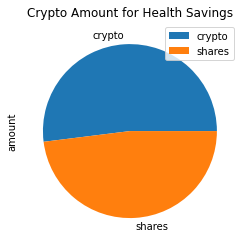

In [30]:
# Plot savings pie chart
# YOUR CODE HERE!
health_df_savings.plot.pie(y="amount", title="Crypto Amount for Health Savings")

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [32]:
# Calculate total amount of savings
# YOUR CODE HERE!
Total_amount_savings = crypto_amount + Inv_shares
Total_amount_savings

88677.75899999999

In [33]:
Need_more_money = Total_amount_savings - emergency_fund
Need_more_money

52677.75899999999

In [34]:
# Validate saving health
# YOUR CODE HERE!

if Total_amount_savings > emergency_fund:
    print("Congratulations you have enough money in this fund")
elif Total_amount_savings == emergency_fund:
    print("Congratulations on reaching this financial goal")
else:
    print(f"You are {Need_more_money} short from reaching this goal")

Congratulations you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
alpaca_api_key = os.getenv("Alpaca_API_Key")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")

In [36]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [37]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [38]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [39]:
MC_tickers = ["SPY", "AGG"]

In [40]:
timeframe = "1D"

In [41]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
MC_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [42]:
# Display sample data
MC_ticker.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year = MCSimulation(
    portfolio_data = MC_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [44]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173.0   
...                           ...       ...       ...      ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420.0   

                                             SPY                          \
                          daily_return      open    high     low   close   
time                                                                       
2015-08-07 00:00:00-04:00          NaN  208.1600  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.2800  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.9800  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.1100  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.7300  209.55  208.01  208.63   
...                                ...       ...     ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.55   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245  
...                              ...          ...  
2020-08-03 00:00:00-04:00   71741125     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72846458     0.006151  
2020-08-06 00:00:00-04:00   76900649     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[1260 rows x 12 columns]

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993216,1.010437,1.009326,1.001521,1.006049,0.994331,0.994481,1.008974,1.008028,0.998611,...,1.001489,0.997594,1.000192,0.998989,1.002792,1.003359,0.994080,0.994521,0.991182,1.001835
2,0.997594,1.019433,1.006354,1.001227,1.010663,0.998207,0.996300,1.010495,1.014785,0.998788,...,1.012018,1.000468,1.000132,0.995655,1.003658,0.993936,0.996112,0.991832,0.994812,1.001333
3,0.999415,1.009925,1.009855,1.002845,1.006724,0.993621,0.991119,1.013133,1.013471,1.001525,...,1.018264,0.997445,0.998079,0.997727,1.002664,0.997784,1.004189,0.981804,0.992730,1.005077
4,0.989763,1.006090,1.012890,1.003262,1.003313,0.995576,0.991968,1.016434,1.009110,1.007807,...,1.015677,1.000187,1.001516,0.998868,1.002151,0.999925,1.005726,0.977518,0.988665,1.013282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.289686,3.312653,4.493776,4.375074,3.542528,5.440613,3.524554,10.282508,4.579820,5.365679,...,5.642565,5.217146,7.624962,5.894314,3.894429,8.028659,5.495018,2.971488,5.157913,11.362038
7557,4.304814,3.333041,4.460168,4.393815,3.545101,5.460541,3.533501,10.351474,4.591474,5.418879,...,5.674059,5.221150,7.706251,5.875796,3.896171,7.977539,5.506439,2.973828,5.169042,11.468782
7558,4.281705,3.392653,4.480268,4.373684,3.532676,5.393846,3.532899,10.357125,4.602701,5.414469,...,5.717584,5.237267,7.701543,5.848999,3.873545,7.960738,5.520289,2.972404,5.200465,11.273603
7559,4.273205,3.366391,4.502583,4.350299,3.558270,5.370101,3.539832,10.325934,4.635826,5.387096,...,5.692521,5.242295,7.759556,5.872027,3.851750,7.990406,5.518307,2.972267,5.171083,11.298103


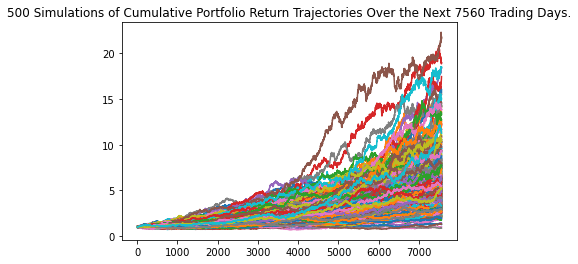

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30year.plot_simulation()

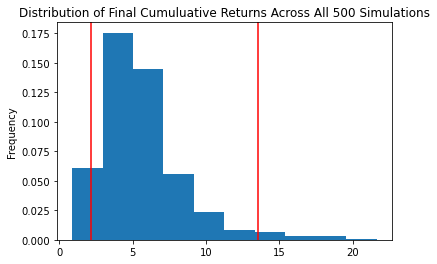

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              5.621843
std               2.840901
min               0.885464
25%               3.669098
50%               5.134754
75%               6.669274
max              21.628574
95% CI Lower      2.148567
95% CI Upper     13.526654
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42971.34 and $270533.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*(20000*1.5),2)
ci_upper = round(tbl[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64457.02 and $405799.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year = MCSimulation(
    portfolio_data = MC_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001853,1.003076,1.008569,1.003155,1.000112,1.000479,0.985313,1.001513,0.991121,1.005092,...,1.005179,1.000570,1.004622,1.005865,1.001417,1.008341,0.999048,1.008591,0.987990,0.996207
2,1.003725,1.003721,1.010840,1.001119,0.991484,1.009784,0.997857,1.000143,0.987087,1.000161,...,1.000933,1.008235,0.995870,1.007518,1.000459,1.019959,1.005651,1.000568,1.000754,0.999120
3,1.005157,0.997451,1.017439,1.005684,0.988947,1.011656,1.009712,1.003615,0.982898,0.997609,...,0.996681,1.013933,0.989284,1.010716,0.994524,1.020547,1.004945,1.000281,0.993728,0.992933
4,1.002782,0.998727,1.023110,1.003325,0.989257,1.019303,1.011461,1.007424,0.980264,0.993026,...,1.000624,1.016999,0.979330,1.006204,0.995435,1.021545,1.003517,0.996794,0.992081,0.994825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.554066,1.275143,1.204487,1.255784,1.095726,1.230514,1.107042,1.254873,1.297545,1.329755,...,0.948439,1.213451,1.372404,1.293196,1.181356,1.547637,1.216696,1.376073,1.320189,1.731706
1257,1.568182,1.271427,1.202604,1.256076,1.099830,1.230230,1.109989,1.245207,1.302642,1.341095,...,0.948667,1.212136,1.374599,1.292812,1.190648,1.541024,1.223389,1.380237,1.324460,1.735226
1258,1.562526,1.271361,1.204218,1.263500,1.094769,1.235739,1.114432,1.240332,1.302975,1.330418,...,0.948414,1.203106,1.357176,1.301545,1.192211,1.546167,1.214445,1.363680,1.329013,1.741017
1259,1.568551,1.261883,1.204439,1.260910,1.101837,1.233762,1.114676,1.238953,1.302635,1.329594,...,0.937300,1.206779,1.362030,1.301620,1.190431,1.533392,1.201956,1.364245,1.330023,1.747563


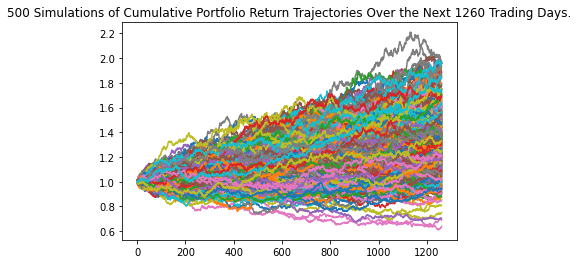

In [53]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5year.plot_simulation()

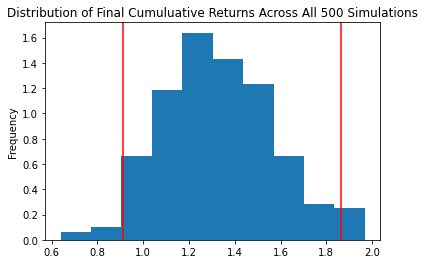

In [54]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5year.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl5 = MC_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl5)

count           500.000000
mean              1.329252
std               0.242313
min               0.638458
25%               1.163449
50%               1.315583
75%               1.489346
max               1.968446
95% CI Lower      0.910459
95% CI Upper      1.865402
Name: 1260, dtype: float64


In [56]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl5[8]*20000,2)
ci_upper_five = round(tbl5[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18209.18 and $37308.05


### Ten Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = MC_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [58]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997343,1.002418,1.006125,1.006461,0.999591,0.996574,1.000550,1.007902,0.991643,1.006267,...,1.002357,1.001690,0.993996,1.003134,0.999475,1.000110,1.012933,1.000697,1.001918,1.001103
2,1.001601,1.006886,1.007097,1.009709,1.001150,0.990030,1.002000,1.006496,0.993704,1.009133,...,1.013828,1.001481,0.992433,1.004515,1.004726,1.005245,1.011718,0.993924,1.000984,1.003849
3,1.001850,1.012890,1.008492,1.008100,0.998456,0.994909,1.008251,1.001585,1.000881,1.009669,...,1.008917,1.008524,0.997022,1.007406,1.002346,1.003330,1.006057,0.989498,0.994478,0.991527
4,1.005409,1.015041,1.021364,1.001163,0.996860,1.003659,1.018578,0.997655,0.986602,1.012510,...,1.011567,1.009758,0.997987,1.003305,0.999856,1.004673,1.009065,0.990529,1.001357,0.994902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.197869,1.421432,1.826113,1.042029,1.778562,1.304499,1.694399,1.267981,1.946658,2.043014,...,1.345732,2.139105,1.070846,1.604642,2.757612,1.173562,2.203958,1.937059,1.932404,1.564383
2517,2.196887,1.439566,1.825927,1.035610,1.788744,1.309537,1.695636,1.261524,1.950474,2.039579,...,1.345604,2.134517,1.068666,1.613930,2.764564,1.173507,2.209907,1.937868,1.936118,1.576559
2518,2.185408,1.449108,1.831249,1.044627,1.798513,1.306800,1.696656,1.257632,1.951270,2.026189,...,1.345236,2.137806,1.063526,1.604056,2.771886,1.163800,2.211566,1.959326,1.936486,1.569174
2519,2.195967,1.440369,1.832830,1.048432,1.799759,1.309448,1.680266,1.253689,1.962707,2.037256,...,1.346543,2.129629,1.066466,1.607509,2.773013,1.160388,2.225201,1.966375,1.946756,1.559064


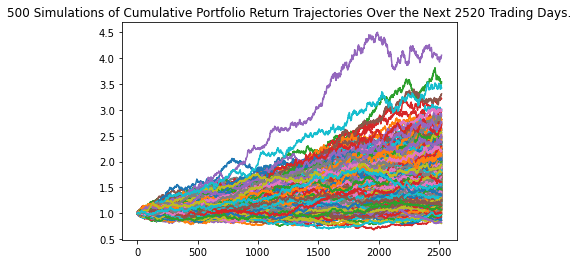

In [59]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_10year.plot_simulation()

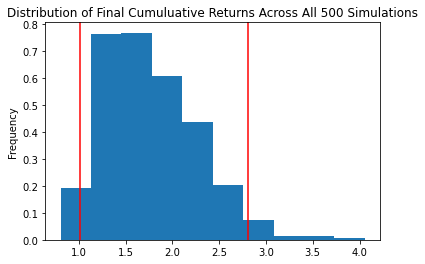

In [60]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_10year.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl10 = MC_10year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl10)

count           500.000000
mean              1.771513
std               0.493547
min               0.805285
25%               1.392455
50%               1.708396
75%               2.095601
max               4.057086
95% CI Lower      1.011399
95% CI Upper      2.811679
Name: 2520, dtype: float64


In [62]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl10[8]*20000,2)
ci_upper_ten = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20227.98 and $270533.08
